<a href="https://colab.research.google.com/github/ARU-Bioinformatics/advanced-programming-SBV/blob/main/numpy_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducing the multidimensional array in NumPy for fast array computations

Welcome to this notebook on NumPy! This will guide you through the basics of using two dimensional (2D) arrays. In this notebook we are going to look at what Numpy can be used for, and get used to the basic syntax.

1.  Let's import the built-in random Python module and NumPy:

In [ ]:
import random
import numpy as np

2.  We generate two Python lists, x and y, each one containing 1 million random numbers between 0 and 1:



In [ ]:
n = 1000000
x = [random.random() for _ in range(n)]
y = [random.random() for _ in range(n)]

x[:3], y[:3]

3.  Let's compute the element-wise sum of all of these numbers: the first element of x plus the first element of y, and so on. We use a for loop in a list comprehension:



In [ ]:
z = [x[i] + y[i] for i in range(n)]
z[:3]

[1.217, 1.061, 1.781]

4.  How long does this computation take? IPython defines a handy %timeit magic command to quickly evaluate the time taken by a single statement:



In [ ]:
%timeit [x[i] + y[i] for i in range(n)]

101 ms ± 5.12 ms per loop (mean ± std. dev. of 7 runs,
    10 loops each)


5.  Now, we will perform the same operation with NumPy. NumPy works on multidimensional arrays, so we need to convert our lists to arrays. The np.array() function does just that:

In [ ]:
xa = np.array(x)
ya = np.array(y)

xa[:3]

The xa and ya arrays contain the exact same numbers that our original lists, x and y, contained. Those lists were instances of the list built-in class, while our arrays are instances of the ndarray NumPy class. These types are implemented very differently in Python and NumPy. In this example, we will see that using arrays instead of lists leads to drastic performance improvements.

6.  To compute the element-wise sum of these arrays, we don't need to do a for loop anymore. In NumPy, adding two arrays means adding the elements of the arrays component-by-component. This is the standard mathematical notation in linear algebra (operations on vectors and matrices):



In [ ]:
za = xa + ya
za[:3]

array([ 1.217,  1.061,  1.781])

We see that the z list and the za array contain the same elements (the sum of the numbers in x and y).

Be careful not to use the + operator between vectors when they are represented as Python lists! This operator is valid between lists, so it would not raise an error and it could lead to subtle and silent bugs. In fact, list1 + list2 is the concatenation of two lists, not the element-wise addition.

7.  Let's compare the performance of this NumPy operation with the native Python loop:



In [ ]:
%timeit xa + ya

1.09 ms ± 37.3 µs per loop (mean ± std. dev. of 7 runs,
    1000 loops each)


With NumPy, we went from 100 ms down to 1 ms to compute one million additions!



8.  Now, we will compute something else: the sum of all elements in x or xa. Although this is not an element-wise operation, NumPy is still highly efficient here. The pure Python version uses the built-in sum() function on an iterable. The NumPy version uses the np.sum() function on a NumPy array:

In [ ]:
%timeit sum(x)  # pure Python

%timeit np.sum(xa)  # NumPy

3.94 ms ± 4.44 µs per loop (mean ± std. dev. of 7 runs
    100 loops each)


We also observe a significant speedup here.

9.  Finally, let's perform one last operation: computing the arithmetic distance between any pair of numbers in our two lists (we only consider the first 1000 elements to keep computing times reasonable). First, we implement this in pure Python with two nested for loops:

In [ ]:
d = [abs(x[i] - y[j])
     for i in range(1000)
     for j in range(1000)]

d[:3]

10.  Now, we use a NumPy implementation, bringing out two slightly more advanced notions. First, we consider a two-dimensional array (or matrix). This is how we deal with the two indices, i and j. Second, we use broadcasting to perform an operation between a 2D array and 1D array.

The NumPy array is a homogeneous block of data organized in a multidimensional finite grid. All elements of the array share the same data type, also called dtype (integer, floating-point number, and so on). The shape of the array is an n-tuple that gives the size of each axis.

A 1D array is a vector; its shape is just the number of components.

A 2D array is a matrix; its shape is (number of rows, number of columns).

The following figure illustrates the structure of a 3D (3, 4, 2) array that contains 24 elements:
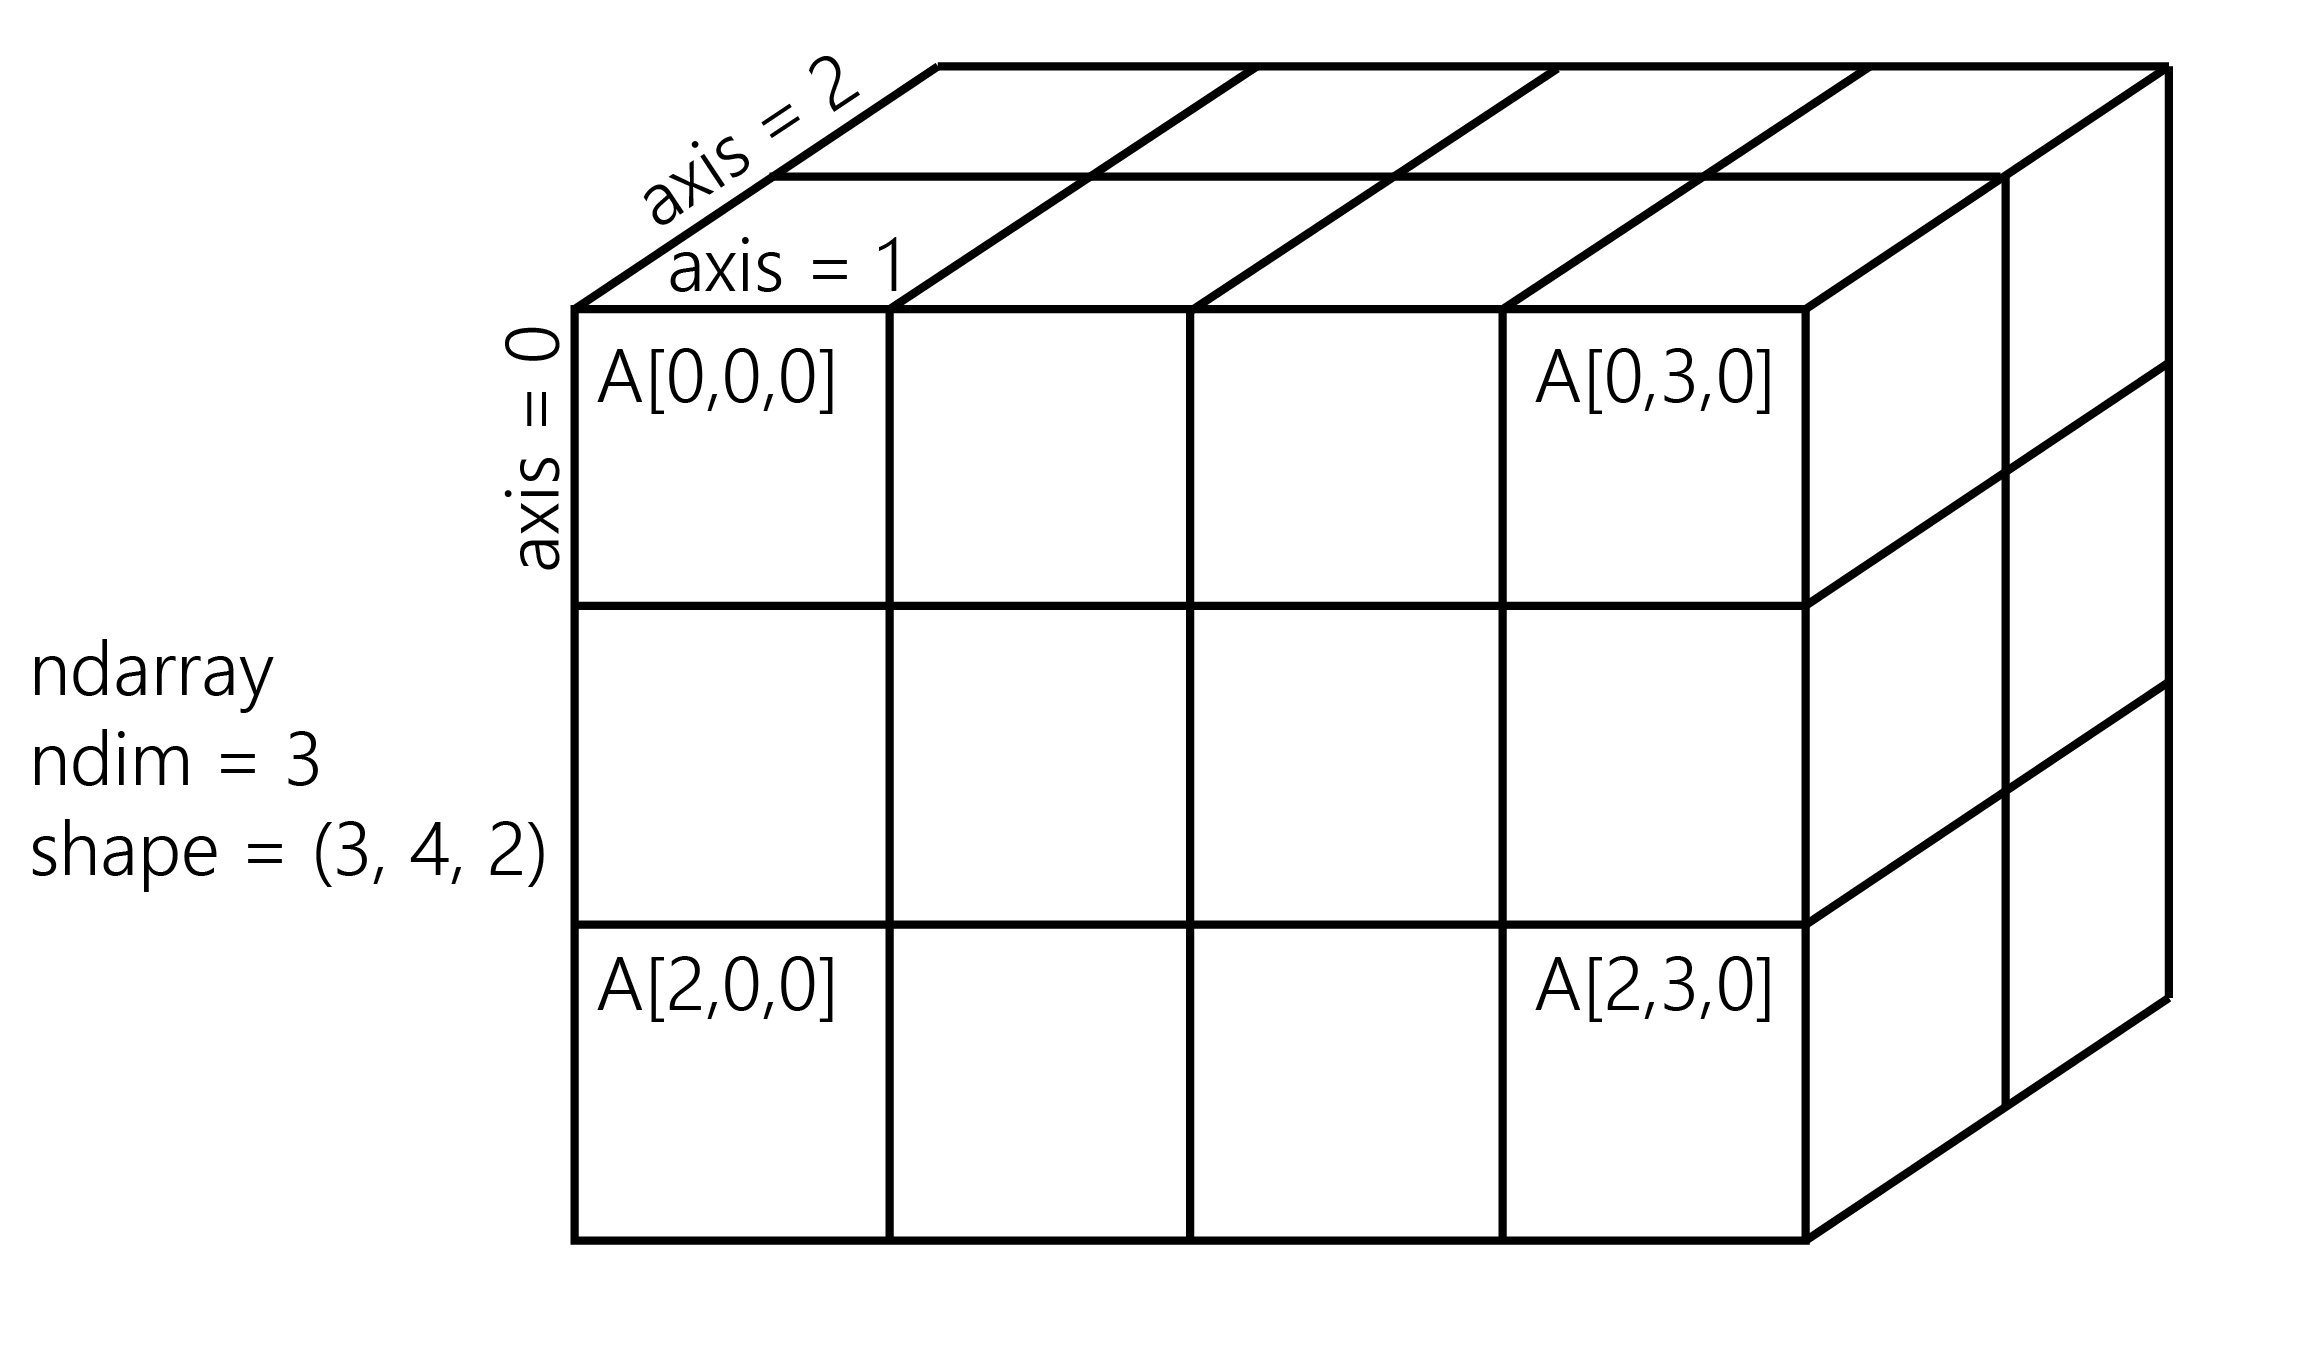

In [ ]:
da = np.abs(xa[:1000, np.newaxis] - ya[:1000])

da

%timeit [abs(x[i] - y[j]) \
         for i in range(1000) \
         for j in range(1000)]

%timeit np.abs(xa[:1000, np.newaxis] - ya[:1000])

Here again, we observe a significant speedup.

Exercise: Demonstrate for yourself how fast are vector computations in NumPy?